In [1]:
import nnsight

from information_flow_routes.graph import (
    construct_information_flow_graph,
    find_prediction_paths,
    Graph,
    Component,
    subgraph_from_token_nodes,
)
from information_flow_routes.model import tokens_to_strings
from information_flow_routes.utilities import find_token_substring_positions
from information_flow_routes.visualization import Renderer

In [2]:
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"

ZERO_SHOT_THRESHOLD = 0.07
FEW_SHOT_THRESHOLD = 0.03

In [3]:
model = nnsight.LanguageModel(MODEL_NAME)
model.config.output_attentions = True

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/Users/fpiedrah/Workspace/information-flow-routes/.venv/lib/python3.13/site-packages/transformers/generation/configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(
`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


(<Figure size 1350x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token ":" (position 18)'}>)

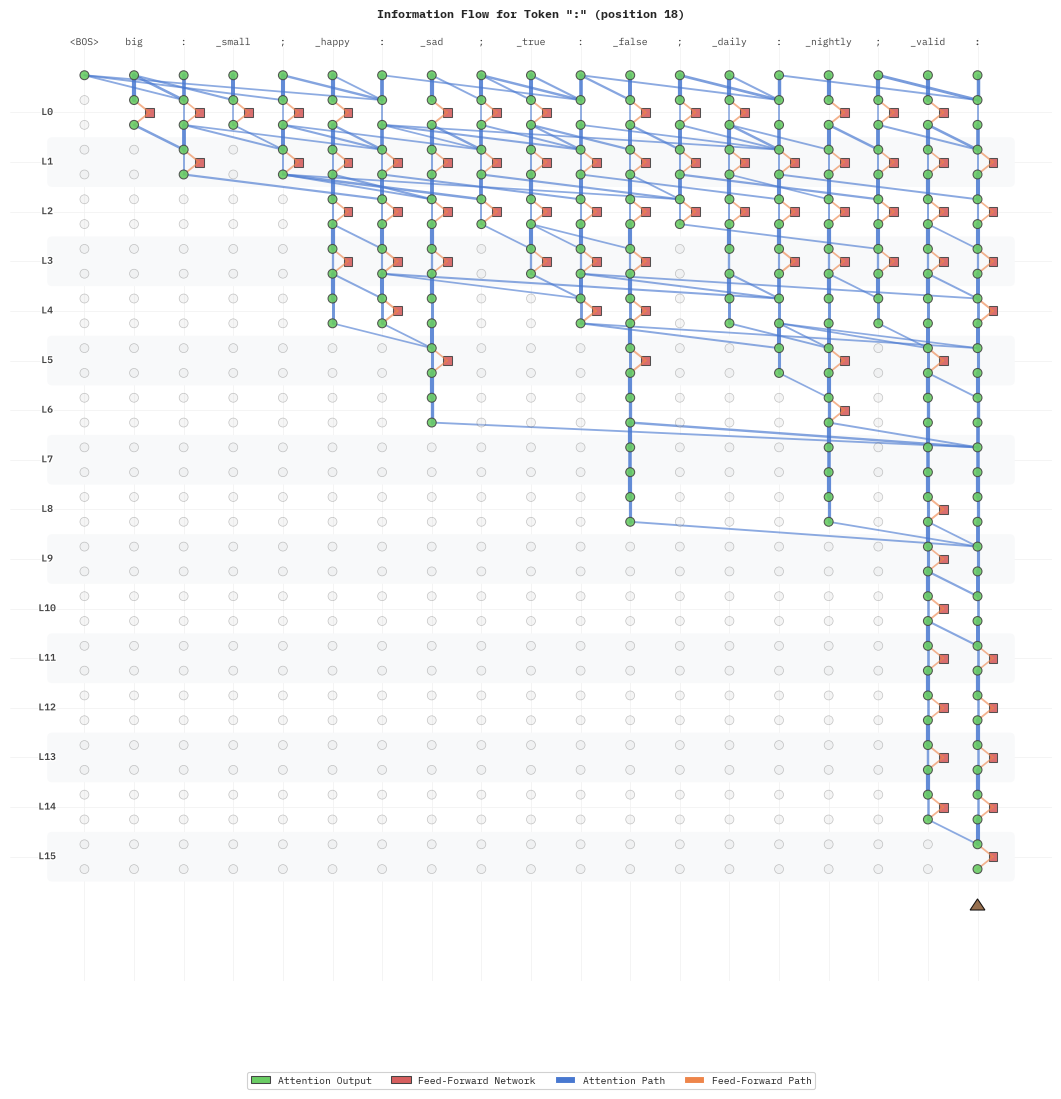

In [4]:
few_shot_prompt = "big: small; happy: sad; true: false; daily: nightly; valid:"

few_shot_tokens = model.tokenizer(
    few_shot_prompt,
    return_tensors="pt",
)["input_ids"]
few_shot_string_tokens = tokens_to_strings(model.tokenizer, few_shot_tokens)

Renderer(
    model.config.num_hidden_layers,
    few_shot_string_tokens,
    len(few_shot_string_tokens) - 1,
).plot(
    find_prediction_paths(
        construct_information_flow_graph(
            model, few_shot_prompt, FEW_SHOT_THRESHOLD
        ),
        len(few_shot_string_tokens) - 1,
        FEW_SHOT_THRESHOLD,
    )
)

(<Figure size 750x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token " is" (position 6)'}>)

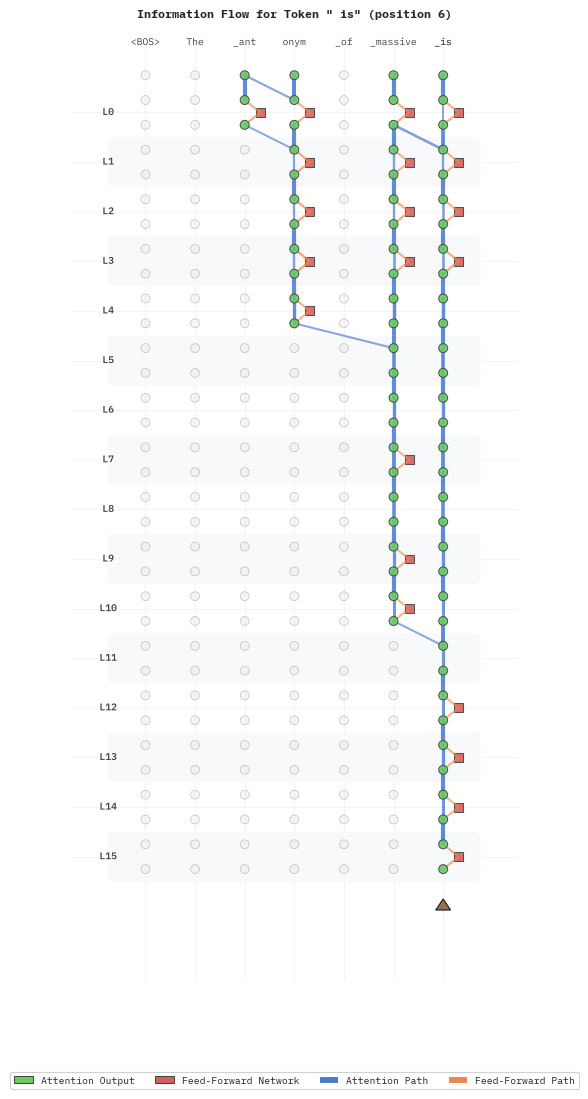

In [5]:
instructed_prompt = "The antonym of massive is"

instructed_tokens = model.tokenizer(
    instructed_prompt,
    return_tensors="pt",
)["input_ids"]
instructed_string_tokens = tokens_to_strings(
    model.tokenizer, instructed_tokens
)

instructed_renderer = Renderer(
    model.config.num_hidden_layers,
    instructed_string_tokens,
    len(instructed_string_tokens) - 1,
)

instructed_renderer.plot(
    find_prediction_paths(
        construct_information_flow_graph(
            model, instructed_prompt, ZERO_SHOT_THRESHOLD
        ),
        len(instructed_string_tokens) - 1,
        ZERO_SHOT_THRESHOLD,
    )
)

(<Figure size 750x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token " is" (position 6)'}>)

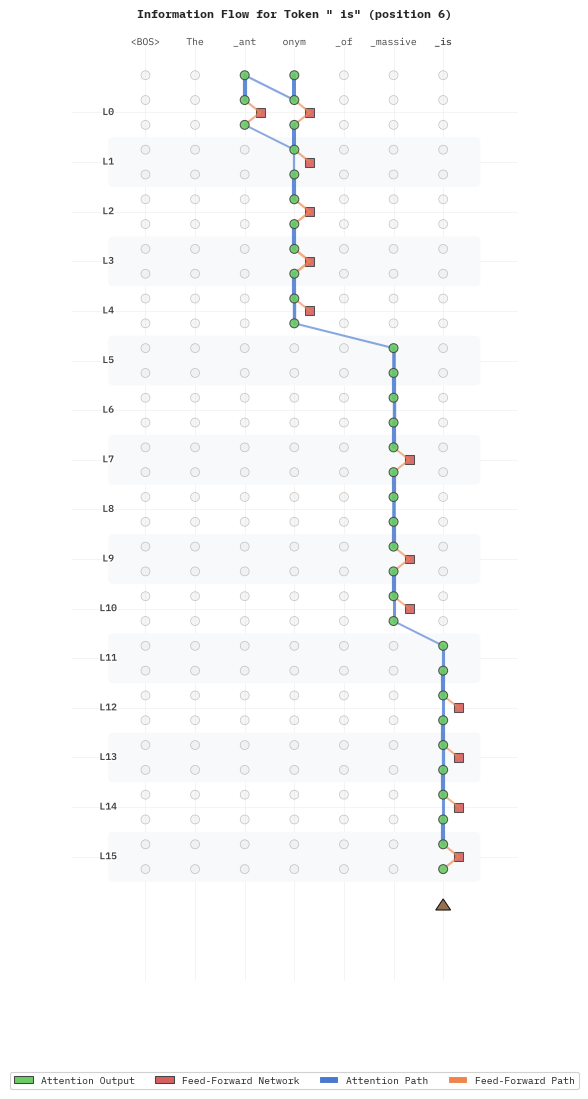

In [6]:
instructed_antonym_substring = ["antonym"]
instructed_antonym_root_indices = find_token_substring_positions(
    instructed_prompt,
    instructed_antonym_substring,
    model.tokenizer,
    prepend_space=True,
)

instructed_renderer.plot(
    subgraph_from_token_nodes(
        find_prediction_paths(
            construct_information_flow_graph(
                model, instructed_prompt, ZERO_SHOT_THRESHOLD
            ),
            len(instructed_string_tokens) - 1,
            ZERO_SHOT_THRESHOLD,
        ),
        instructed_antonym_root_indices,
        ZERO_SHOT_THRESHOLD,
    )
)

(<Figure size 750x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token " is" (position 6)'}>)

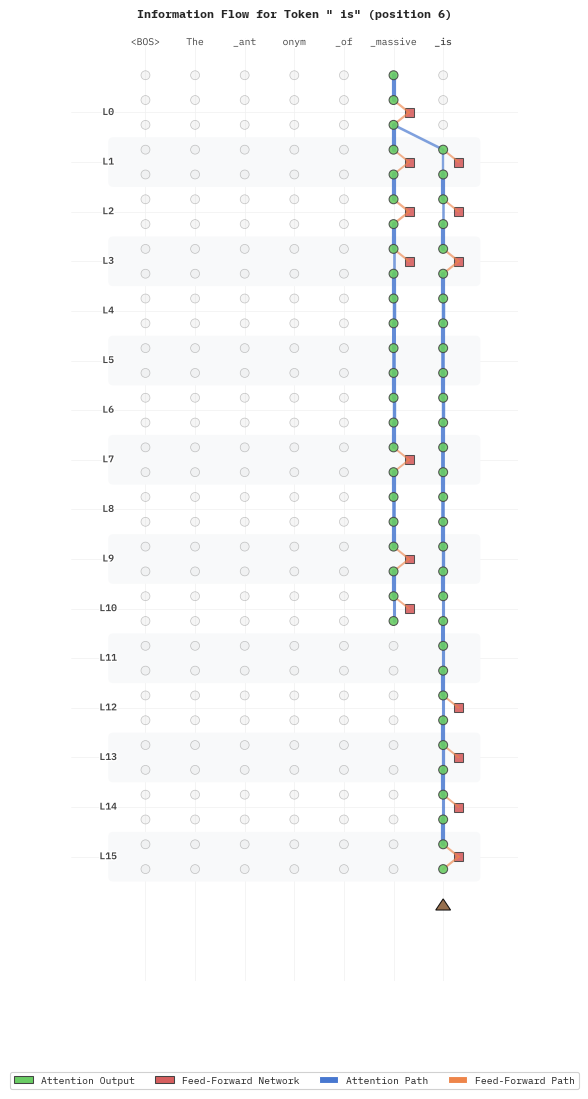

In [7]:
instructed_massive_substring = ["massive"]
instructed_massive_root_indices = find_token_substring_positions(
    instructed_prompt,
    instructed_massive_substring,
    model.tokenizer,
    prepend_space=True,
)

instructed_renderer.plot(
    subgraph_from_token_nodes(
        find_prediction_paths(
            construct_information_flow_graph(
                model, instructed_prompt, ZERO_SHOT_THRESHOLD
            ),
            len(instructed_string_tokens) - 1,
            ZERO_SHOT_THRESHOLD,
        ),
        instructed_massive_root_indices,
        ZERO_SHOT_THRESHOLD,
    )
)

(<Figure size 750x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token " is" (position 6)'}>)

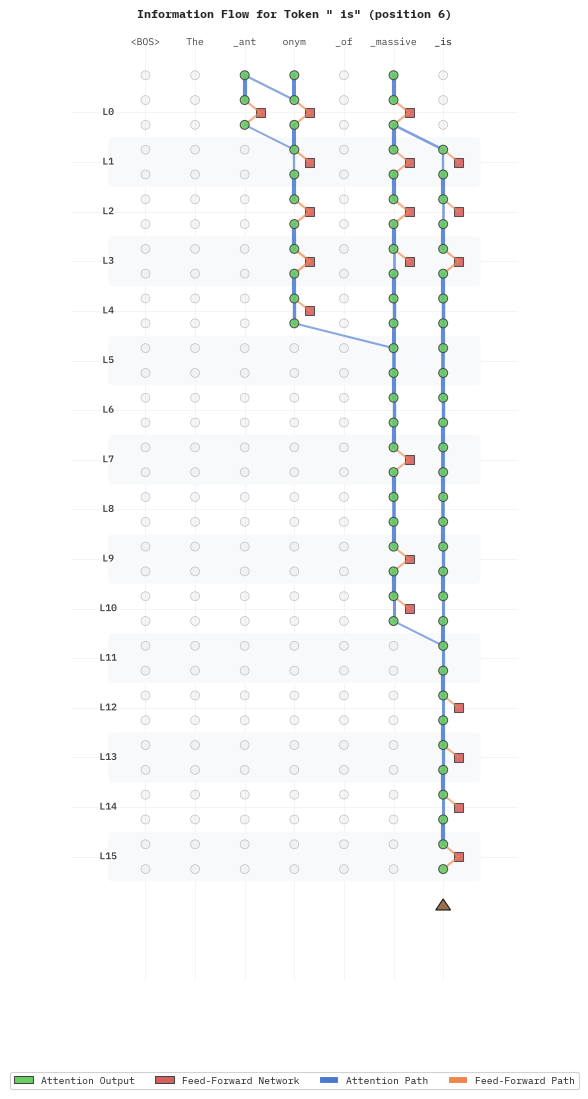

In [8]:
instructed_combined_substring = ["antonym", "massive"]
instructed_combined_root_indices = find_token_substring_positions(
    instructed_prompt,
    instructed_combined_substring,
    model.tokenizer,
    prepend_space=True,
)

instructed_renderer.plot(
    subgraph_from_token_nodes(
        find_prediction_paths(
            construct_information_flow_graph(
                model, instructed_prompt, ZERO_SHOT_THRESHOLD
            ),
            len(instructed_string_tokens) - 1,
            ZERO_SHOT_THRESHOLD,
        ),
        instructed_combined_root_indices,
        ZERO_SHOT_THRESHOLD,
    )
)